In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt
okt = Okt()

In [46]:
data = pd.read_json('1.json', encoding='utf-8')
data = data.iloc[:, 0]

In [47]:
title=[]
genre = []
lyrics=[]
for i in data:
    title.append(i['title'])
    cnt = i['type']
    cnt = cnt.split(',')
    genre.append(cnt[0])
    lyrics.append(i['release'])

data = pd.DataFrame({'title':title, 'genre':genre, 'lyrics':lyrics})

In [48]:
lyric_temp = []
for i in range(data.shape[0]):
    lyric_temp.append(data['lyrics'].iloc[i].lower())

In [49]:
import re
p = re.compile('[a-z]+')
lyric_temp = []
temp_1 = []
temp_2 = []
for i in range(data.shape[0]):
    # 영어 가사가 있는 노래는 완전 제외
    # if not p.search(data['lyrics'].iloc[i]) and len(data['lyrics'].iloc[i]) > 20:

    # 영어 가사가 있는 부분을 삭제
    if len(data['lyrics'].iloc[i]) > 20:
        lyric_temp.append(data['lyrics'].iloc[i].replace('[a-z]+', ''))
        temp_1.append(data['title'].iloc[i])
        temp_2.append(data['genre'].iloc[i])

In [50]:
data = pd.DataFrame({'title' : temp_1, 'genre' : temp_2, 'lyrics' : lyric_temp})

In [51]:
data

,title,genre,lyrics
0,다시 여기 바닷가,댄스,예아 호우 예예예싹쓰리 인더 하우스커커커커커몬 싹 쓰리 투 렛츠고나 다시 또 설레어...
1,눈누난나 (NUNU NANA),랩/힙합,I’m trying to give usomething moreSo come with...
2,마리아 (Maria),댄스,욕을 하도 먹어 체했어 하도서러워도 어쩌겠어 I do모두들 미워하느라 애썼네날 무너...
3,그 여름을 틀어줘,댄스,이 여름 다시 한번 설레고 싶다그때 그 여름을 틀어줘그 여름을 들려줘그때 그 여름을...
4,How You Like That,랩/힙합,보란 듯이 무너졌어바닥을 뚫고 저 지하까지옷 끝자락 잡겠다고저 높이 두 손을 뻗어봐...
...,...,...,...
4421,당신만이,발라드,눈부신 햇살이 비춰주어도 제게 무슨 소용있겠어요 이토록 아름다운 당신만이 나에게 빛...
4422,겁나 (Feat. 매드클라운),발라드,너무 살가웠던 네가언제나 다정했던 네가꼭 오늘 따라다른 사람 같아어떻게 해야 해자꾸...
4423,시간과 낙엽,발라드,맨발로 기억을 거닐다 떨어지는 낙엽에 그간 잊지 못한 사람들을 보낸다 맨발로 기억을...
4424,내일,록/메탈,모두가 돌아간 자리행복한 걸음으로 갈까정말 바라던 꿈들을 이룬 걸까밀렸던 숙제를 하...


In [52]:
sw_file = open('./korean_stopwords.txt', 'r', encoding='utf-8')
sw_list = []
for sw in sw_file.readlines():
  sw_list.append(sw.replace('\n', ''))
sw_list += ['은', '는', '이']
sw_file.close()

In [53]:
tokenized_data = []
for sentence in data['lyrics']:
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in sw_list] # 불용어 제거
    tokenized_data.append(temp_X)
tokenized_data[:5]

[['호우',
  '쓰리다',
  '인더',
  '하우스',
  '커커커커커몬',
  '쓰리다',
  '투',
  '렛츠고',
  '다시',
  '설레다',
  '이렇게',
  '만나다',
  '지금',
  '공기',
  '다시다',
  '널',
  '볼',
  '순',
  '없다',
  '거',
  '라고',
  '추억',
  '뿐',
  '이라',
  '서랍',
  '속',
  '꼭',
  '넣다',
  '두다',
  '흐르다',
  '속',
  '서너',
  '기억',
  '점점',
  '희미하다',
  '가다',
  '끝나다',
  '알다',
  '여름',
  '바닷가',
  '단둘',
  '파도',
  '취해',
  '서',
  '노래',
  '꿈',
  '꾸다',
  '바닷가',
  '이제',
  '말',
  '싶다',
  '더욱',
  '빛나다',
  '별',
  '되어다',
  '고다',
  '덥다',
  '막',
  '짜증',
  '괜찮다',
  '따뜻하다',
  '퐁당',
  '빠지다',
  '버리다',
  '널',
  '젠',
  '가지',
  '않다',
  '거',
  '모래',
  '위',
  '펴다',
  '펴다',
  '펴다',
  '편지',
  '써다',
  '밀물',
  '밀려오다',
  '지우다',
  '추억',
  '되다',
  '뻔하다',
  '첫',
  '느낌',
  '랑',
  '다시',
  '한번',
  '받다',
  '보고',
  '싶다',
  '흐르다',
  '속',
  '서너',
  '기억',
  '점점',
  '희미하다',
  '가다',
  '끝나다',
  '알다',
  '여름',
  '바닷가',
  '단둘',
  '파도',
  '취해',
  '서',
  '노래',
  '꿈',
  '꾸다',
  '바닷가',
  '이제',
  '말',
  '싶다',
  '더욱',
  '빛나다',
  '별',
  '되어다',
  '강',
  '건너',
  '맞닿다',
  '나소',
  '중',
  '한',
  '사랑',
  '영원하

가사의 최대 길이 : 1122
가사의 평균 길이 : 214.28264798915498


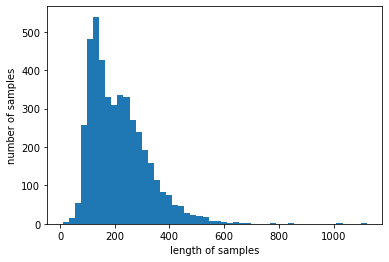

In [54]:
# 리뷰 길이 분포 확인
print('가사의 최대 길이 :',max(len(l) for l in tokenized_data))
print('가사의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(s) for s in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [55]:
model = Word2Vec(sentences = tokenized_data, size = 400, window = 5, min_count = 5, workers = 4, sg = 0)

In [56]:
model.wv.vectors.shape

(10702, 400)

In [57]:
print(model.wv.most_similar("사랑"))

[('말널', 0.8078489899635315), ('한다는', 0.7724002599716187), ('한단', 0.7533077597618103), ('이제야', 0.7501636743545532), ('서툴다', 0.7487279772758484), ('고맙다', 0.7461022138595581), ('이별', 0.7283545732498169), ('진심', 0.7245861291885376), ('겐', 0.7195861339569092), ('약속', 0.7165114879608154)]


In [58]:
print(model.wv.most_similar("바닷가"))

[('단둘', 0.9173424243927002), ('선율', 0.9148850440979004), ('여름날', 0.898250937461853), ('사뿐하다', 0.8922639489173889), ('기차', 0.8875110745429993), ('physical', 0.8829562664031982), ('맡다', 0.8823575973510742), ('빼곡', 0.8789863586425781), ('오후', 0.8727454543113708), ('바위', 0.8721742630004883)]


In [59]:
print(model.wv.most_similar("이별"))

[('서툴다', 0.8737698793411255), ('이라', 0.8605784177780151), ('미련', 0.859275758266449), ('겪다', 0.8492428064346313), ('대도', 0.84861820936203), ('끝내', 0.8465080261230469), ('인연', 0.8445048928260803), ('에겐', 0.8406195640563965), ('욕심', 0.838563859462738), ('헤어지다', 0.837075412273407)]


In [60]:
print(model.wv.most_similar("청춘"))

[('학창시절', 0.9576175212860107), ('빈털터리', 0.9528723955154419), ('발자취', 0.9494743347167969), ('몰려오다', 0.9488455057144165), ('밭길', 0.9446449279785156), ('에너지', 0.9443076848983765), ('건물', 0.9435179233551025), ('득', 0.9434409141540527), ('흐름', 0.9430457353591919), ('가위', 0.9408769607543945)]


In [61]:
print(model.wv.most_similar("커피"))

[('카피', 0.9035605788230896), ('아가씨', 0.8501542806625366), ('사무실', 0.8369426131248474), ('김', 0.8363564014434814), ('옷', 0.8356927633285522), ('다리', 0.8345458507537842), ('한잔', 0.8345171809196472), ('담배', 0.8218232989311218), ('소', 0.8208776712417603), ('공', 0.8197939395904541)]


In [62]:
print(model.wv.most_similar("한잔"))

[('술', 0.9013994932174683), ('누르다', 0.8704407215118408), ('안부', 0.8534367084503174), ('취해', 0.8458711504936218), ('카페', 0.8396168351173401), ('김', 0.8384286165237427), ('커피', 0.8345171809196472), ('담배', 0.8201711177825928), ('자고', 0.8163332343101501), ('취한', 0.8147881031036377)]


In [63]:
print(model.wv.most_similar("love"))

[('thank', 0.7419329285621643), ('BabyMy', 0.733894944190979), ('Artificial', 0.7337667346000671), ('need', 0.7199440002441406), ('forever', 0.7102974057197571), ('miss', 0.7098732590675354), ('Crazy', 0.7093575596809387), ('Always', 0.7023297548294067), ('Could', 0.7006927728652954), ('Falling', 0.6904627084732056)]


In [64]:
import pickle

In [65]:
with open('lyrics_word2vec_remove_eng.p', 'wb') as f:
    pickle.dump(model, f)

In [66]:
# with open('lyrics_word2vec.p', 'rb') as f:
#     model = pickle.load(f)